In [50]:
import pandas as pd

df = pd.read_csv("/Users/csrbharadwaj/Desktop/Projects/Woxen_project/synthetic_match_outcome_data.csv")

In [1]:
# Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import joblib  # For saving and loading models
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# 1 # DATA PREPROCESSING 


# Option 1: Drop rows with missing values
df = df.dropna()

df.head()



,Match_ID,Team1,Team2,Venue,Team1_Runs,Team2_Runs,Match_Winner,Toss_Winner,Toss_Decision,Key_Performance_Metric
0,1,PAK,AUS,Karachi,256,224,Team1,Team1,Bat,49
1,2,NZ,SA,Lord's,246,285,Team2,Team1,Bowl,5
2,3,IND,PAK,Karachi,353,388,Team2,Team2,Bowl,30
3,4,PAK,PAK,Lord's,272,247,Team1,Team1,Bat,60
4,5,AUS,IND,Sydney,225,367,Team1,Team2,Bowl,69


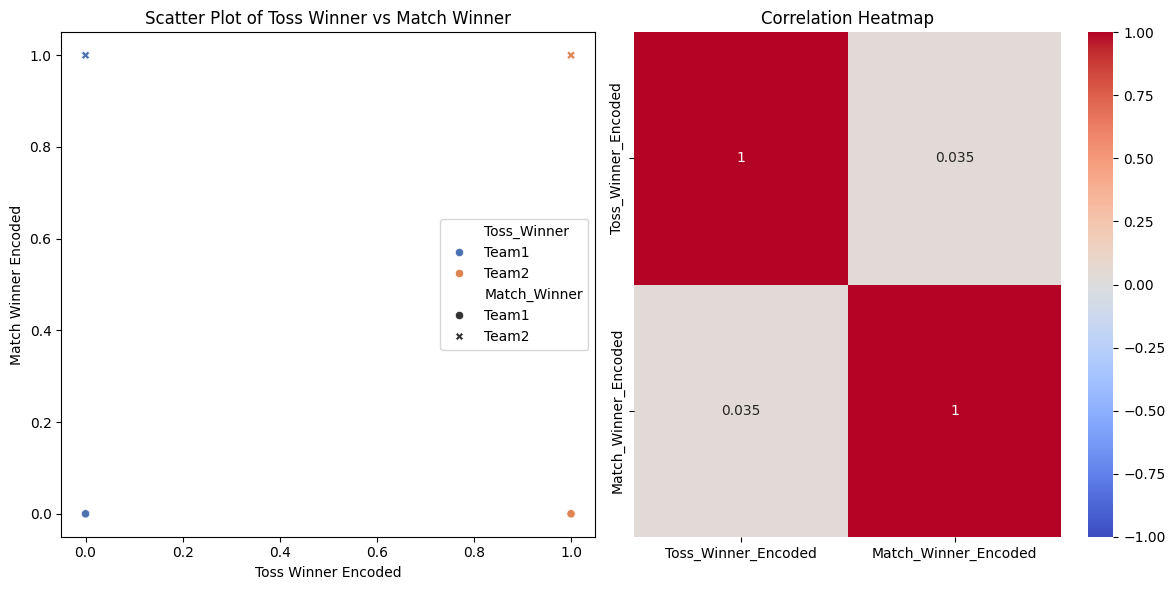

Correlation between Toss Winner and Match Winner: 0.03468237875987003


In [60]:
# Corelation between Match Winner and toss Winner 

# Encode 'Match_Winner' and 'Toss_Winner'
le = LabelEncoder()
df['Match_Winner_Encoded'] = le.fit_transform(df['Match_Winner'])
df['Toss_Winner_Encoded'] = le.fit_transform(df['Toss_Winner'])

# Calculate correlation
correlation = df['Toss_Winner_Encoded'].corr(df['Match_Winner_Encoded'])

# Scatter Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Toss_Winner_Encoded', y='Match_Winner_Encoded', data=df, hue='Toss_Winner', style='Match_Winner', palette='deep')
plt.title('Scatter Plot of Toss Winner vs Match Winner')
plt.xlabel('Toss Winner Encoded')
plt.ylabel('Match Winner Encoded')

# Heatmap of Correlation
plt.subplot(1, 2, 2)
corr_matrix = df[['Toss_Winner_Encoded', 'Match_Winner_Encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()

print(f"Correlation between Toss Winner and Match Winner: {correlation}")

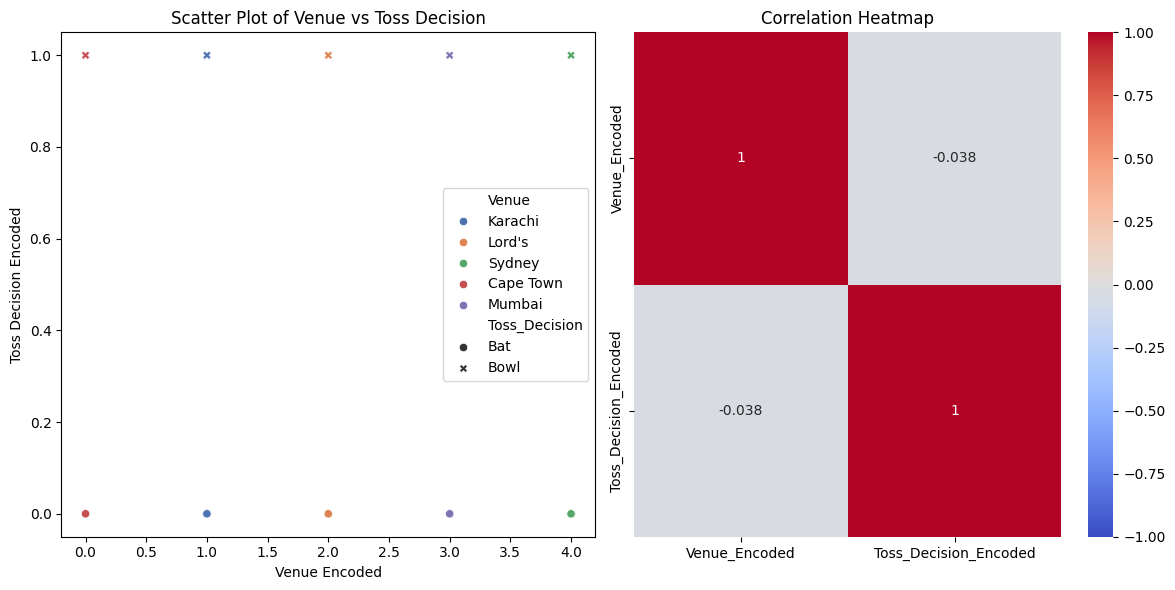

Correlation between Venue and Toss Decision: -0.03832733438006386


In [61]:
# Corelation between venue and toss decision 
# Encode 'Venue' and 'Toss_Decision'
le_venue = LabelEncoder()
le_toss_decision = LabelEncoder()

df['Venue_Encoded'] = le_venue.fit_transform(df['Venue'])
df['Toss_Decision_Encoded'] = le_toss_decision.fit_transform(df['Toss_Decision'])

# Calculate correlation
correlation = df['Venue_Encoded'].corr(df['Toss_Decision_Encoded'])

# Scatter Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Venue_Encoded', y='Toss_Decision_Encoded', data=df, hue='Venue', style='Toss_Decision', palette='deep')
plt.title('Scatter Plot of Venue vs Toss Decision')
plt.xlabel('Venue Encoded')
plt.ylabel('Toss Decision Encoded')

# Heatmap of Correlation
plt.subplot(1, 2, 2)
corr_matrix = df[['Venue_Encoded', 'Toss_Decision_Encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()

print(f"Correlation between Venue and Toss Decision: {correlation}")

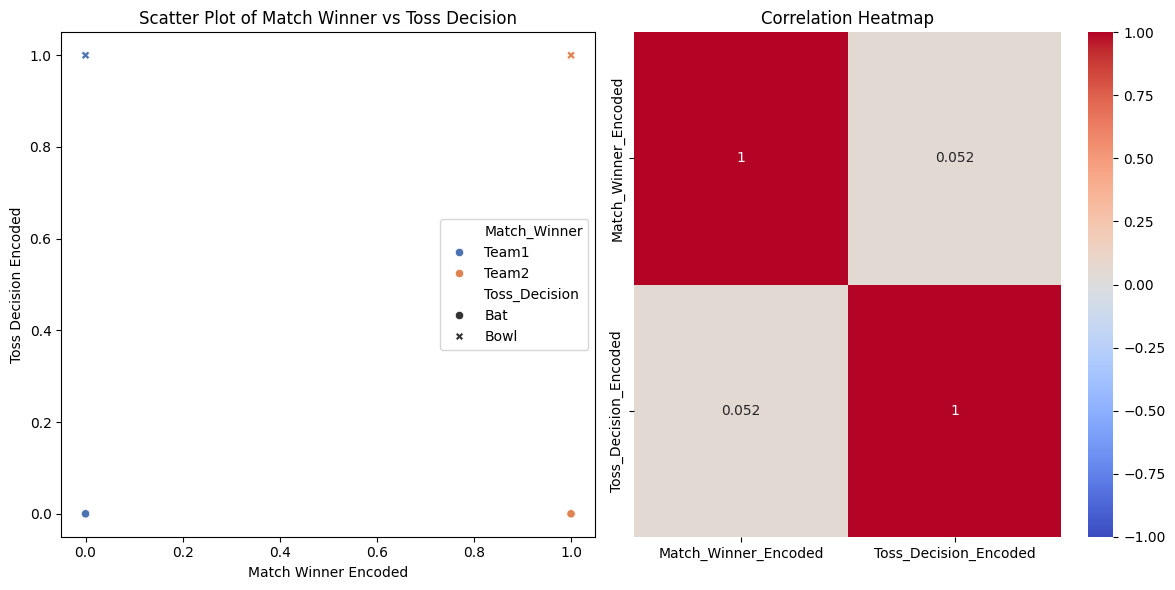

Correlation between Match Winner and Toss Decision: 0.05233956407613682


In [62]:
# Corelation between Match WInner and toss Decision 

# Encode 'Match_Winner' and 'Toss_Decision'
le_match_winner = LabelEncoder()
le_toss_decision = LabelEncoder()

df['Match_Winner_Encoded'] = le_match_winner.fit_transform(df['Match_Winner'])
df['Toss_Decision_Encoded'] = le_toss_decision.fit_transform(df['Toss_Decision'])

# Calculate correlation
correlation = df['Match_Winner_Encoded'].corr(df['Toss_Decision_Encoded'])

# Scatter Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Match_Winner_Encoded', y='Toss_Decision_Encoded', data=df, hue='Match_Winner', style='Toss_Decision', palette='deep')
plt.title('Scatter Plot of Match Winner vs Toss Decision')
plt.xlabel('Match Winner Encoded')
plt.ylabel('Toss Decision Encoded')

# Heatmap of Correlation
plt.subplot(1, 2, 2)
corr_matrix = df[['Match_Winner_Encoded', 'Toss_Decision_Encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()

print(f"Correlation between Match Winner and Toss Decision: {correlation}")

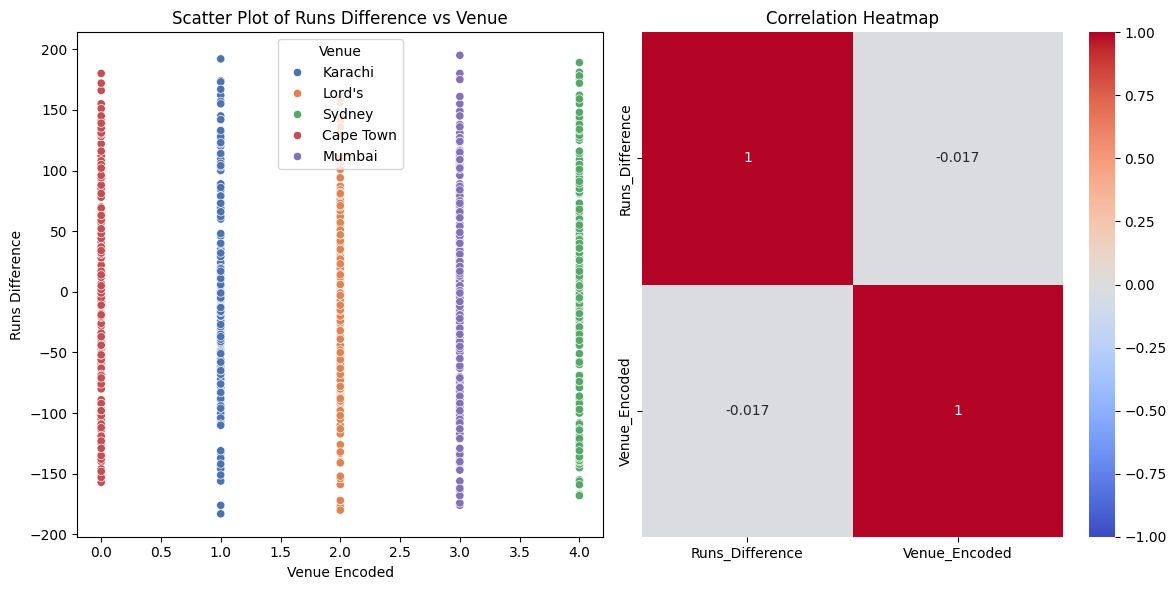

Correlation between Runs Difference and Venue: 0.017279942662082784


In [64]:

# Calculate the difference in runs
df['Runs_Difference'] = df['Team1_Runs'] - df['Team2_Runs']

# Encode 'Venue'
le_venue = LabelEncoder()
df['Venue_Encoded'] = le_venue.fit_transform(df['Venue'])

# Calculate correlation
correlation = abs(df['Runs_Difference'].corr(df['Venue_Encoded']))

# Scatter Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Venue_Encoded', y='Runs_Difference', data=df, hue='Venue', palette='deep')
plt.title('Scatter Plot of Runs Difference vs Venue')
plt.xlabel('Venue Encoded')
plt.ylabel('Runs Difference')

# Heatmap of Correlation
plt.subplot(1, 2, 2)
corr_matrix = df[['Runs_Difference', 'Venue_Encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()

plt.show()

print(f"Correlation between Runs Difference and Venue: {correlation}")

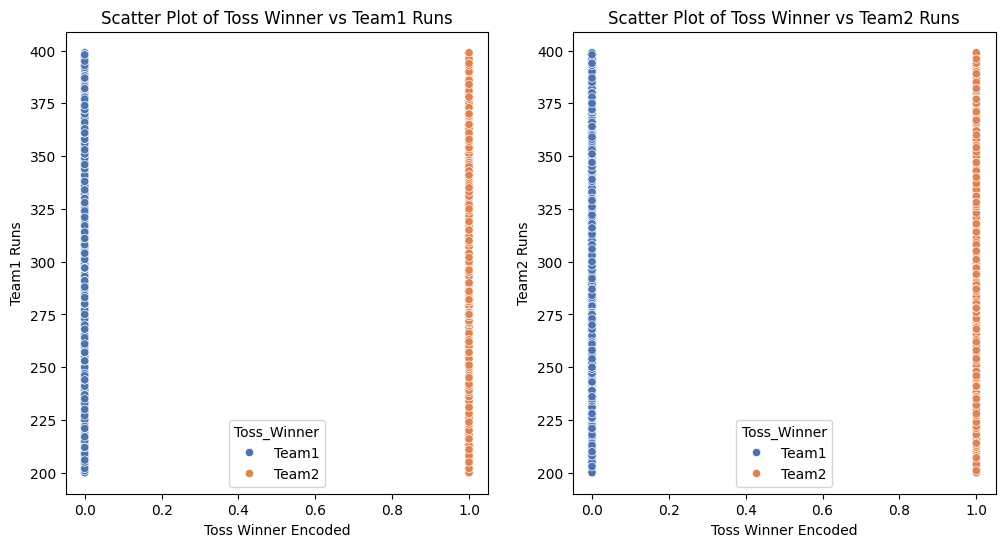

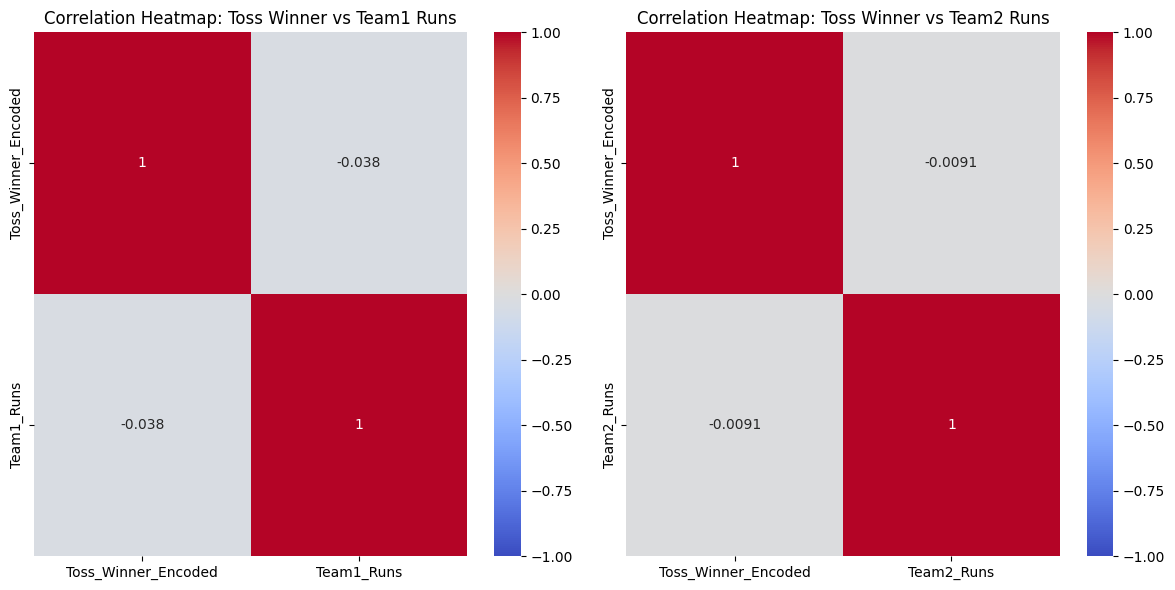

Correlation between Toss Winner and Team1 Runs: -0.03794300664016344
Correlation between Toss Winner and Team2 Runs: -0.009133629461834183


In [65]:
# Encode 'Toss_Winner'
le_toss_winner = LabelEncoder()
df['Toss_Winner_Encoded'] = le_toss_winner.fit_transform(df['Toss_Winner'])

# Calculate correlation between Toss Winner and Team1/Team2 Runs
correlation_team1_runs = df['Toss_Winner_Encoded'].corr(df['Team1_Runs'])
correlation_team2_runs = df['Toss_Winner_Encoded'].corr(df['Team2_Runs'])

# Scatter Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Toss_Winner_Encoded', y='Team1_Runs', data=df, hue='Toss_Winner', palette='deep')
plt.title('Scatter Plot of Toss Winner vs Team1 Runs')
plt.xlabel('Toss Winner Encoded')
plt.ylabel('Team1 Runs')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Toss_Winner_Encoded', y='Team2_Runs', data=df, hue='Toss_Winner', palette='deep')
plt.title('Scatter Plot of Toss Winner vs Team2 Runs')
plt.xlabel('Toss Winner Encoded')
plt.ylabel('Team2 Runs')

# Heatmaps of Correlation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
corr_matrix_team1 = df[['Toss_Winner_Encoded', 'Team1_Runs']].corr()
sns.heatmap(corr_matrix_team1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Toss Winner vs Team1 Runs')

plt.subplot(1, 2, 2)
corr_matrix_team2 = df[['Toss_Winner_Encoded', 'Team2_Runs']].corr()
sns.heatmap(corr_matrix_team2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Toss Winner vs Team2 Runs')

plt.tight_layout()
plt.show()

print(f"Correlation between Toss Winner and Team1 Runs: {correlation_team1_runs}")
print(f"Correlation between Toss Winner and Team2 Runs: {correlation_team2_runs}")

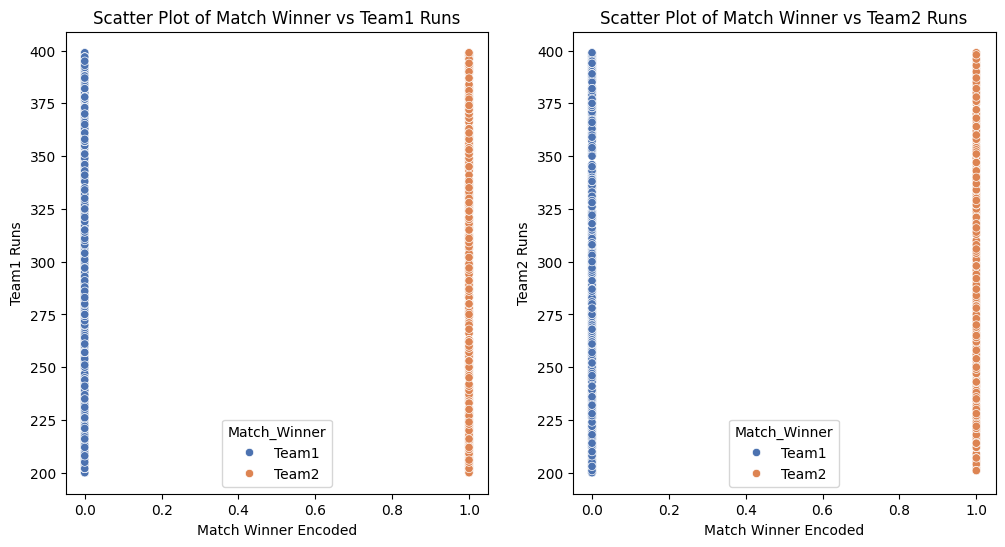

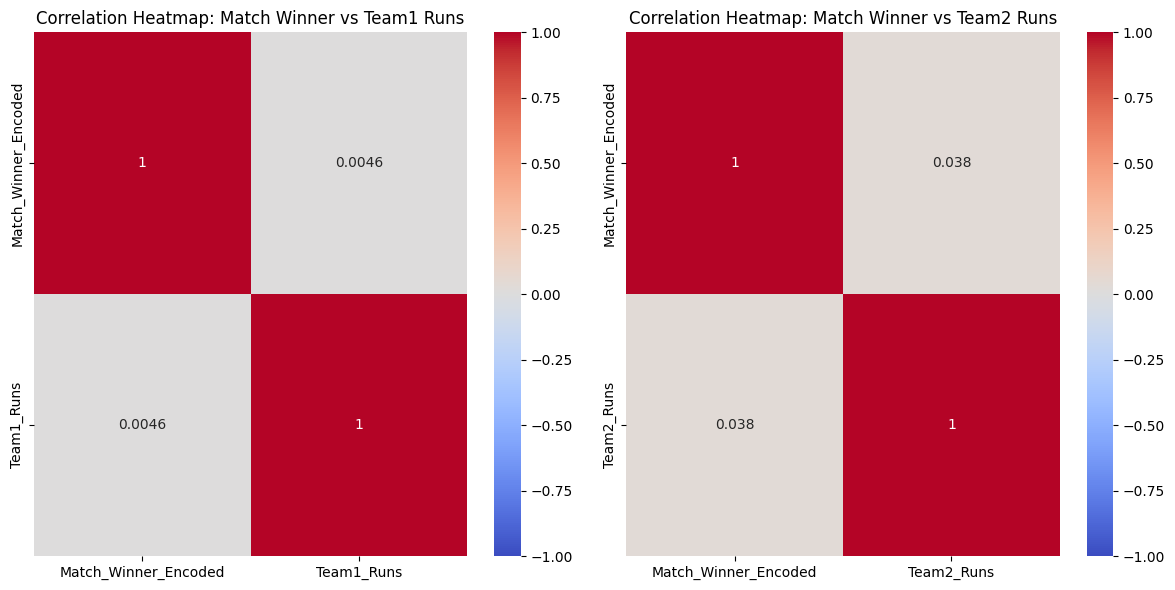

Correlation between Match Winner and Team1 Runs: 0.004573690404305322
Correlation between Match Winner and Team2 Runs: 0.03801289627802205


In [66]:
# Encode 'Match_Winner'
le_match_winner = LabelEncoder()
df['Match_Winner_Encoded'] = le_match_winner.fit_transform(df['Match_Winner'])

# Calculate correlation between Match Winner and Team1/Team2 Runs
correlation_team1_runs = df['Match_Winner_Encoded'].corr(df['Team1_Runs'])
correlation_team2_runs = df['Match_Winner_Encoded'].corr(df['Team2_Runs'])

# Scatter Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Match_Winner_Encoded', y='Team1_Runs', data=df, hue='Match_Winner', palette='deep')
plt.title('Scatter Plot of Match Winner vs Team1 Runs')
plt.xlabel('Match Winner Encoded')
plt.ylabel('Team1 Runs')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Match_Winner_Encoded', y='Team2_Runs', data=df, hue='Match_Winner', palette='deep')
plt.title('Scatter Plot of Match Winner vs Team2 Runs')
plt.xlabel('Match Winner Encoded')
plt.ylabel('Team2 Runs')

# Heatmaps of Correlation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
corr_matrix_team1 = df[['Match_Winner_Encoded', 'Team1_Runs']].corr()
sns.heatmap(corr_matrix_team1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Match Winner vs Team1 Runs')

plt.subplot(1, 2, 2)
corr_matrix_team2 = df[['Match_Winner_Encoded', 'Team2_Runs']].corr()
sns.heatmap(corr_matrix_team2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Match Winner vs Team2 Runs')

plt.tight_layout()
plt.show()

print(f"Correlation between Match Winner and Team1 Runs: {correlation_team1_runs}")
print(f"Correlation between Match Winner and Team2 Runs: {correlation_team2_runs}")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import simpledialog, messagebox

# Load DataFrame from CSV
df = pd.read_csv("/Users/csrbharadwaj/Desktop/Projects/Woxen_project/synthetic_match_outcome_data.csv")

# Handle special case for 'Toss_Winner' and 'Match_Winner'
def adjust_winner_column(df):
    df['Match_Winner'] = df.apply(lambda row: row['Team1'] if row['Match_Winner'] == 'Team1' else row['Team2'], axis=1)
    df['Toss_Winner'] = df.apply(lambda row: row['Team1'] if row['Toss_Winner'] == 'Team1' else row['Team2'], axis=1)
    return df

df = adjust_winner_column(df)

# Create encoding dictionaries
def create_encodings(df, columns):
    encodings = {}
    for column in columns:
        unique_values = df[column].dropna().unique()
        encodings[column] = {value: idx for idx, value in enumerate(unique_values)}
    return encodings

def reverse_encodings(encodings):
    return {col: {idx: val for val, idx in encoding.items()} for col, encoding in encodings.items()}

# Define columns to encode
columns_to_encode = ['Team1', 'Team2', 'Venue', 'Toss_Winner', 'Toss_Decision', 'Match_Winner']
encodings = create_encodings(df, columns_to_encode)
reverse_encodings_dict = reverse_encodings(encodings)

# Encode DataFrame
def encode_df(df, encodings):
    encoded_df = df.copy()
    for column, encoding in encodings.items():
        encoded_df[column + '_Encoded'] = df[column].map(encoding)
    return encoded_df

encoded_df = encode_df(df, encodings)

# Features and target
features = encoded_df[['Team1_Encoded', 'Team2_Encoded', 'Venue_Encoded', 'Toss_Winner_Encoded', 'Toss_Decision_Encoded']]
target = encoded_df['Match_Winner_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Function to predict match winner
def predict_match_winner(team1, team2, venue, toss_winner, toss_decision):
    # Encode input features
    try:
        team1_encoded = encodings['Team1'][team1]
        team2_encoded = encodings['Team2'][team2]
        venue_encoded = encodings['Venue'][venue]
        toss_winner_encoded = encodings['Toss_Winner'][toss_winner]
        toss_decision_encoded = encodings['Toss_Decision'][toss_decision]
    except KeyError as e:
        raise ValueError(f"Unseen label encountered: {e}")
    
    # Prepare input for prediction
    input_features = [[team1_encoded, team2_encoded, venue_encoded, toss_winner_encoded, toss_decision_encoded]]
    
    # Predict
    prediction_encoded = model.predict(input_features)[0]
    match_winner = reverse_encodings_dict['Match_Winner'][prediction_encoded]
    
    return match_winner

# Function to prompt user for input and make prediction
def get_user_input():
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    
    # Predefined options for selection
    teams = list(encodings['Team1'].keys())
    venues = list(encodings['Venue'].keys())
    toss_decisions = list(encodings['Toss_Decision'].keys())
    
    # Create dialog boxes for user input
    team1 = simpledialog.askstring("Input", f"Select Team 1 from: {', '.join(teams)}")
    team2 = simpledialog.askstring("Input", f"Select Team 2 from: {', '.join(teams)}")
    venue = simpledialog.askstring("Input", f"Select Venue from: {', '.join(venues)}")
    toss_winner = simpledialog.askstring("Input", f"Select Toss Winner from: {', '.join(teams)}")
    toss_decision = simpledialog.askstring("Input", f"Select Toss Decision from: {', '.join(toss_decisions)}")
    
    # Print for debugging
    print(f"User Input - Team1: {team1}, Team2: {team2}, Venue: {venue}, Toss Winner: {toss_winner}, Toss Decision: {toss_decision}")
    print(f"Valid Teams: {teams}")
    print(f"Valid Venues: {venues}")
    print(f"Valid Toss Decisions: {toss_decisions}")
    
    # Check if all inputs are valid
    if (team1 in encodings['Team1']) and (team2 in encodings['Team2']) and (venue in encodings['Venue']) and (toss_winner in encodings['Toss_Winner']) and (toss_decision in encodings['Toss_Decision']):
        predicted_winner = predict_match_winner(team1, team2, venue, toss_winner, toss_decision)
        
        # Display and print predicted winner
        messagebox.showinfo("Prediction Result", f"Predicted Match Winner: {predicted_winner}")
        print(f"Predicted Match Winner: {predicted_winner}")  # Print in console
    else:
        messagebox.showwarning("Input Error", "Please select valid options for all fields.")
    
    # Destroy the root window to close Tkinter
    root.destroy()

# Run the input function
get_user_input()


Model Accuracy: 0.62
User Input - Team1: PAK, Team2: IND, Venue: Mumbai, Toss Winner: IND, Toss Decision: Bat
Valid Teams: ['PAK', 'NZ', 'IND', 'AUS', 'SA', 'ENG']
Valid Venues: ['Karachi', "Lord's", 'Sydney', 'Cape Town', 'Mumbai']
Valid Toss Decisions: ['Bat', 'Bowl']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted Match Winner: IND


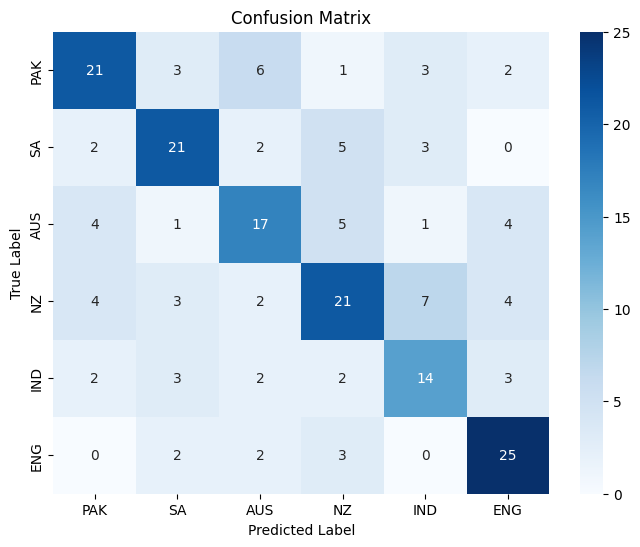

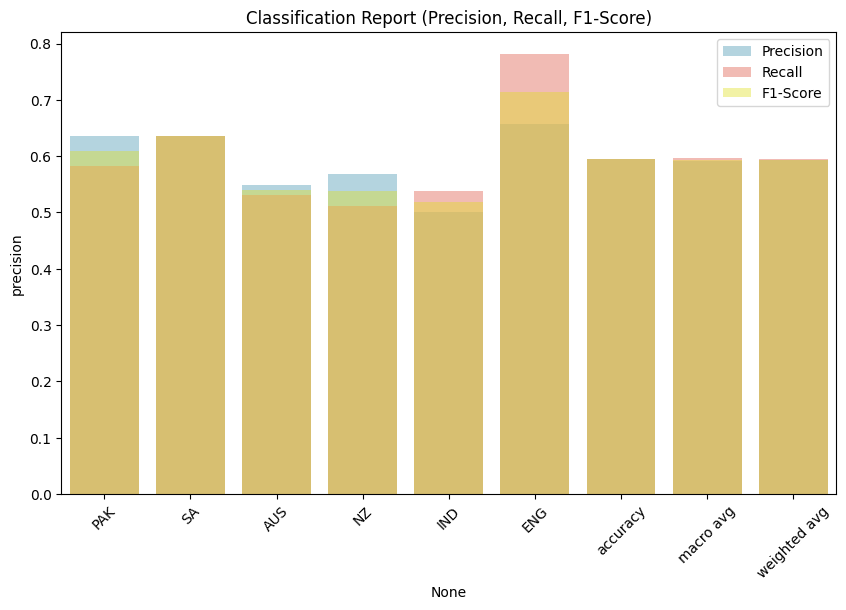

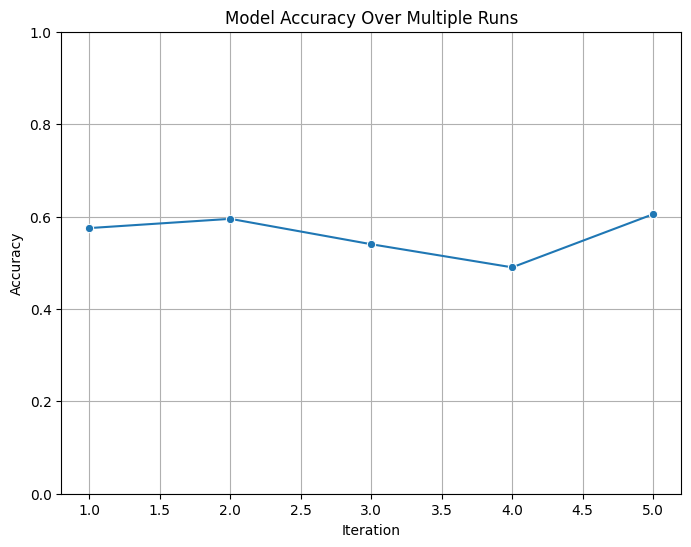

Model Accuracy: 0.60


: 

In [4]:
# VIZ

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(encodings['Match_Winner'].keys()), yticklabels=list(encodings['Match_Winner'].keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Generate classification report
report = classification_report(y_test, y_pred, target_names=list(encodings['Match_Winner'].keys()), output_dict=True)

# Convert classification report to DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification metrics (Precision, Recall, F1-Score)
plt.figure(figsize=(10, 6))
sns.barplot(x=report_df.index, y=report_df['precision'], color='lightblue', label='Precision')
sns.barplot(x=report_df.index, y=report_df['recall'], color='salmon', label='Recall', alpha=0.6)
sns.barplot(x=report_df.index, y=report_df['f1-score'], color='yellow', label='F1-Score', alpha=0.4)
plt.legend()
plt.xticks(rotation=45)
plt.title('Classification Report (Precision, Recall, F1-Score)')
plt.show()

# Example loop for running multiple experiments (5 iterations)
accuracies = []
iterations = 5  # Number of runs

for i in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=i)
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracies over multiple iterations
plt.figure(figsize=(8, 6))
sns.lineplot(x=list(range(1, iterations + 1)), y=accuracies, marker='o')
plt.title('Model Accuracy Over Multiple Runs')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# Evaluate the model
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")




/var/folders/4w/8nc72yd54xn14md6yf7nj8wr0000gn/T/ipykernel_10661/277869837.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Venue', y='Avg_Runs', data=venue_avg_runs, palette='viridis')


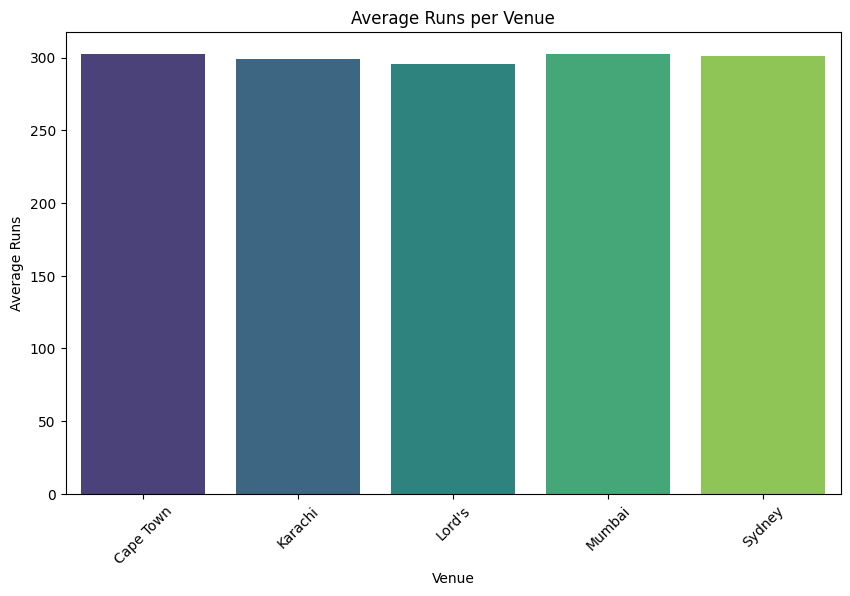

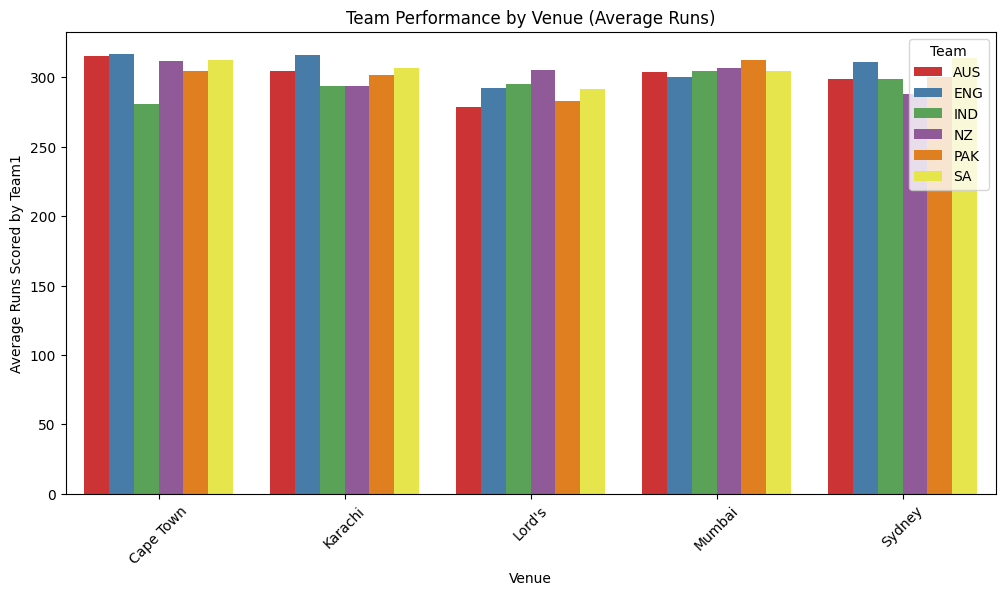

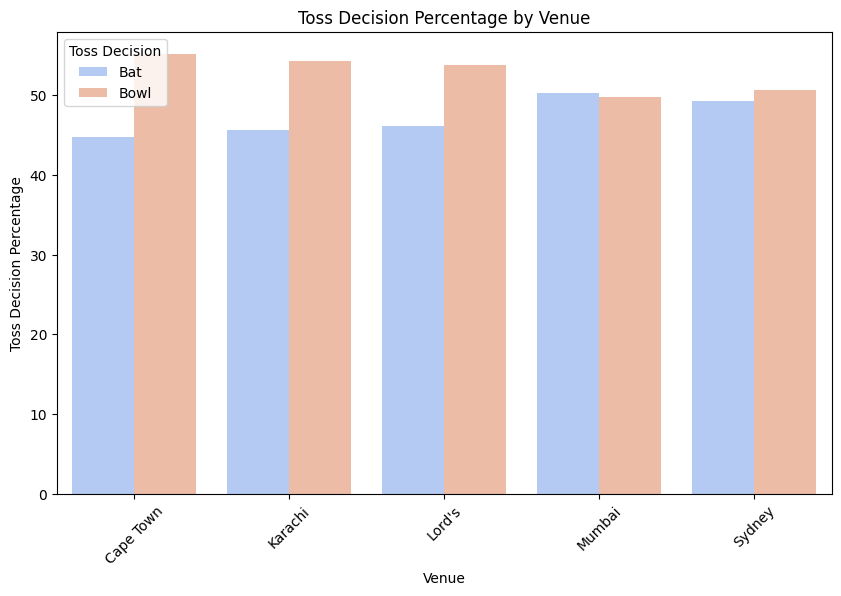

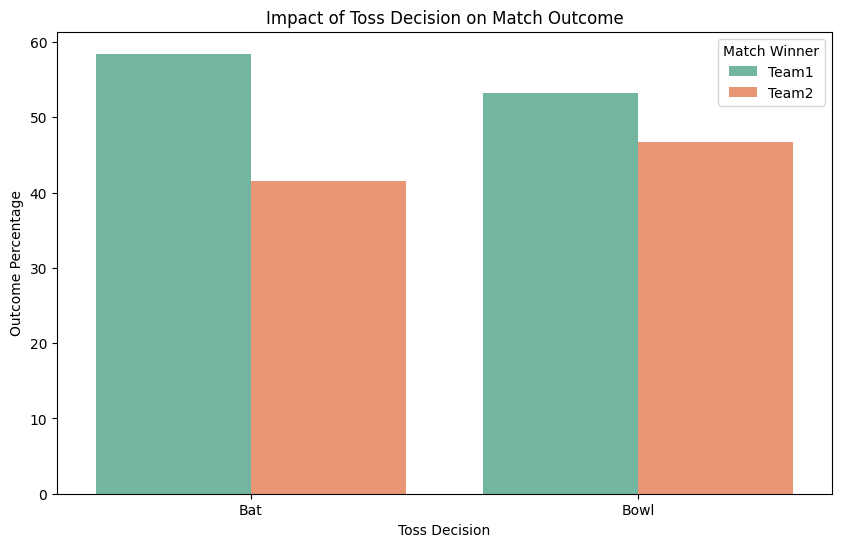

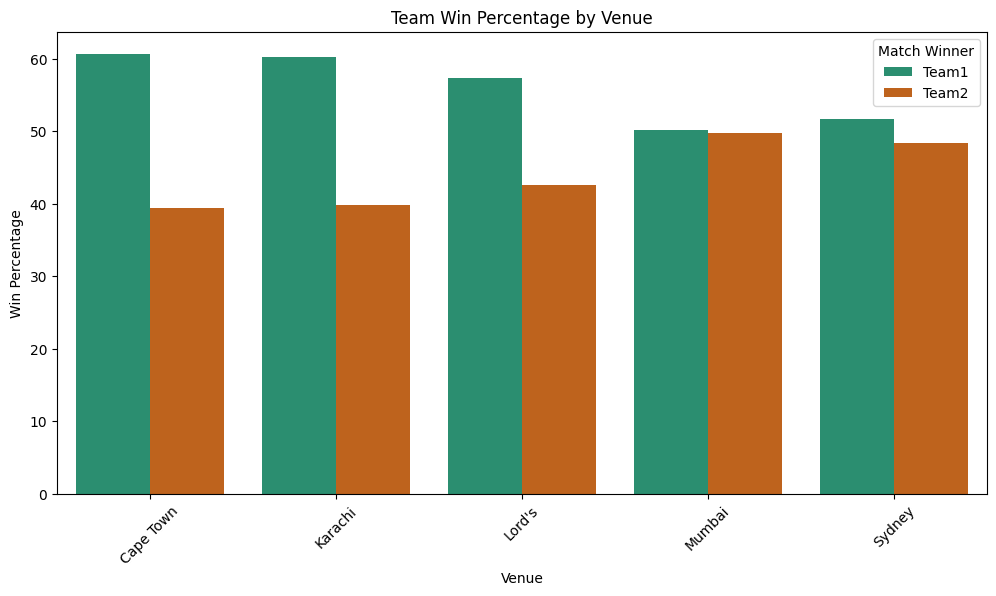

/var/folders/4w/8nc72yd54xn14md6yf7nj8wr0000gn/T/ipykernel_10661/277869837.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Match_Winner', data=df, palette='Set3')


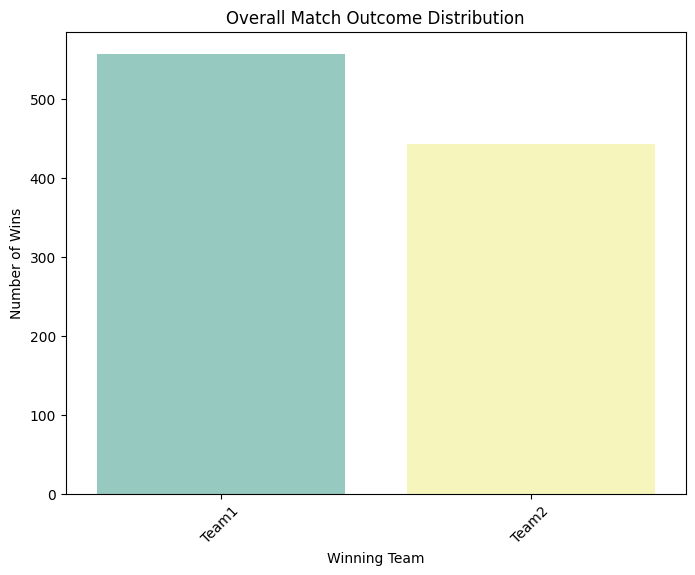

In [4]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (adjust the file path accordingly)
df = pd.read_csv('/Users/csrbharadwaj/Desktop/Projects/Woxen_project/synthetic_match_outcome_data.csv')

# Group by Venue to calculate average runs per ground
venue_avg_runs = df.groupby('Venue')[['Team1_Runs', 'Team2_Runs']].mean().reset_index()
venue_avg_runs['Avg_Runs'] = venue_avg_runs[['Team1_Runs', 'Team2_Runs']].mean(axis=1)

# Plot average runs per ground
plt.figure(figsize=(10, 6))
sns.barplot(x='Venue', y='Avg_Runs', data=venue_avg_runs, palette='viridis')
plt.title('Average Runs per Venue')
plt.xlabel('Venue')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()

# Group by Venue and Team1 to get average performance per team at each ground
team_performance = df.groupby(['Venue', 'Team1'])['Team1_Runs'].mean().reset_index()

# Plot team performance by venue
plt.figure(figsize=(12, 6))
sns.barplot(x='Venue', y='Team1_Runs', hue='Team1', data=team_performance, palette='Set1')
plt.title('Team Performance by Venue (Average Runs)')
plt.xlabel('Venue')
plt.ylabel('Average Runs Scored by Team1')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.show()

# Calculate the percentage of toss decisions at each venue
toss_decision_percentage = df.groupby(['Venue', 'Toss_Decision']).size().reset_index(name='Counts')
toss_decision_percentage['Toss_Decision_Pct'] = toss_decision_percentage.groupby('Venue')['Counts'].transform(lambda x: 100 * x / x.sum())

# Plot toss decision percentages per ground
plt.figure(figsize=(10, 6))
sns.barplot(x='Venue', y='Toss_Decision_Pct', hue='Toss_Decision', data=toss_decision_percentage, palette='coolwarm')
plt.title('Toss Decision Percentage by Venue')
plt.xlabel('Venue')
plt.ylabel('Toss Decision Percentage')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.show()

# Group by Toss Decision and Match Winner
toss_decision_outcome = df.groupby(['Toss_Decision', 'Match_Winner']).size().reset_index(name='Counts')
toss_decision_outcome['Outcome_Pct'] = toss_decision_outcome.groupby('Toss_Decision')['Counts'].transform(lambda x: 100 * x / x.sum())

# Plot toss decision impact on match outcome
plt.figure(figsize=(10, 6))
sns.barplot(x='Toss_Decision', y='Outcome_Pct', hue='Match_Winner', data=toss_decision_outcome, palette='Set2')
plt.title('Impact of Toss Decision on Match Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Outcome Percentage')
plt.legend(title='Match Winner')
plt.show()

# Calculate win percentage for each team per venue
team_win_percentage = df.groupby(['Venue', 'Match_Winner']).size().reset_index(name='Counts')
team_win_percentage['Win_Pct'] = team_win_percentage.groupby('Venue')['Counts'].transform(lambda x: 100 * x / x.sum())

# Plot team win percentage by venue
plt.figure(figsize=(12, 6))
sns.barplot(x='Venue', y='Win_Pct', hue='Match_Winner', data=team_win_percentage, palette='Dark2')
plt.title('Team Win Percentage by Venue')
plt.xlabel('Venue')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.legend(title='Match Winner')
plt.show()

# Plot overall match outcome distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Match_Winner', data=df, palette='Set3')
plt.title('Overall Match Outcome Distribution')
plt.xlabel('Winning Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


  Team1    Venue Home_Away
0   PAK  Karachi      HOME
1    NZ   Lord's      AWAY
2   IND  Karachi      AWAY
3   PAK   Lord's      AWAY
4   AUS   Sydney      HOME


/var/folders/4w/8nc72yd54xn14md6yf7nj8wr0000gn/T/ipykernel_10661/2773637128.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Home_Away', y='Avg_Runs', data=home_away_stats, palette='coolwarm')


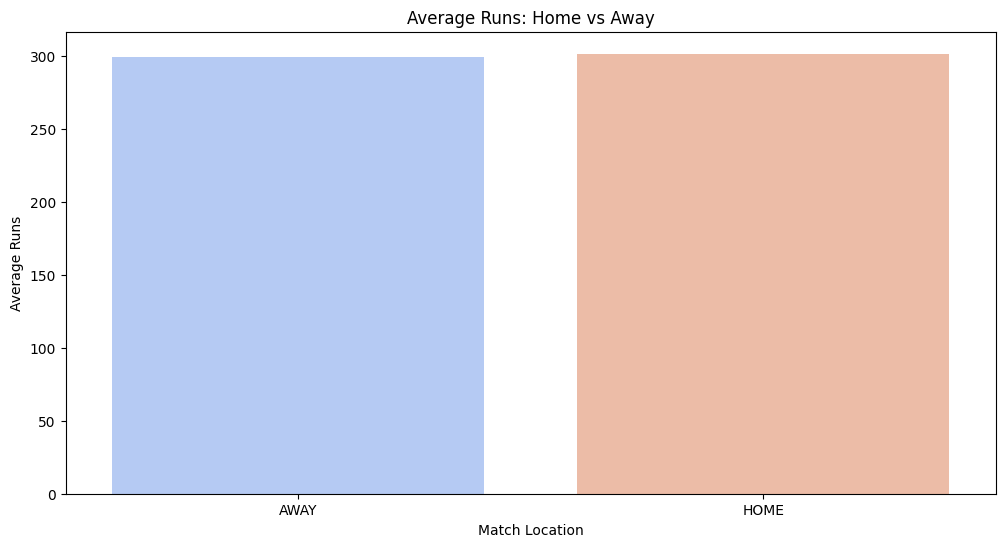

/var/folders/4w/8nc72yd54xn14md6yf7nj8wr0000gn/T/ipykernel_10661/2773637128.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Home_Away', y='Win_Percentage', data=home_away_stats, palette='Set1')


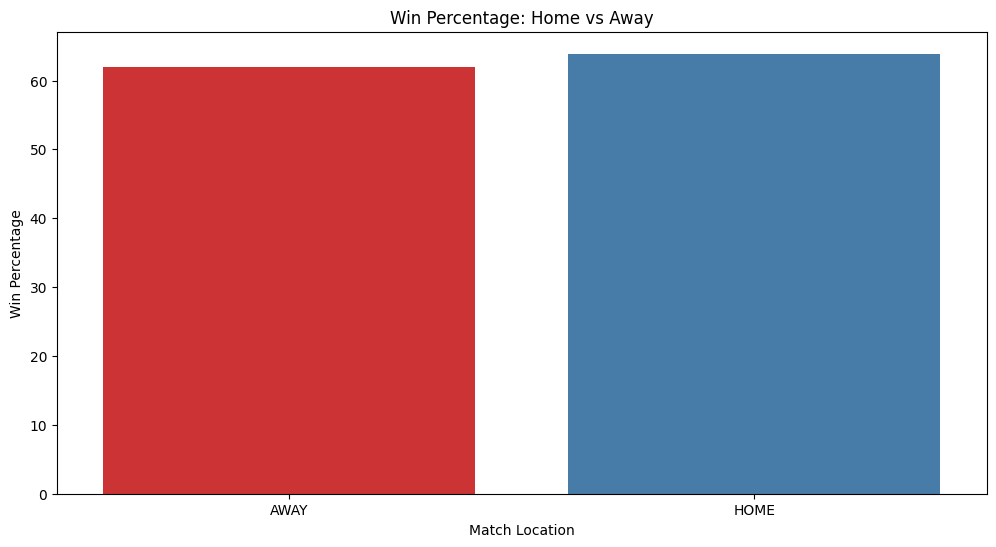

Home Advantage (Average Runs Difference): 0.32 runs


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Team and Country mappings
team_country_mapping = {
    'PAK': 'Pakistan',
    'NZ': 'New Zealand',
    'IND': 'India',
    'AUS': 'Australia',
    'SA': 'South Africa',
    'ENG': 'England'
}

# Venue to Country mapping
venue_country_mapping = {
    'Karachi': 'Pakistan',
    'Lord\'s': 'England',
    'Sydney': 'Australia',
    'Cape Town': 'South Africa',
    'Mumbai': 'India'
}

# Load DataFrame from CSV
df = pd.read_csv("/Users/csrbharadwaj/Desktop/Projects/Woxen_project/synthetic_match_outcome_data.csv")

# Handle special case for 'Toss_Winner' and 'Match_Winner'
def adjust_winner_column(df):
    df['Match_Winner'] = df.apply(lambda row: row['Team1'] if row['Match_Winner'] == 'Team1' else row['Team2'], axis=1)
    df['Toss_Winner'] = df.apply(lambda row: row['Team1'] if row['Toss_Winner'] == 'Team1' else row['Team2'], axis=1)
    return df

df = adjust_winner_column(df)

# Function to determine if the match is HOME or AWAY for Team1
def assign_home_away(row):
    team_country = team_country_mapping.get(row['Team1'])
    venue_country = venue_country_mapping.get(row['Venue'])
    if team_country and venue_country:
        return 'HOME' if team_country == venue_country else 'AWAY'
    return 'UNKNOWN'

# Apply the function to the DataFrame
df['Home_Away'] = df.apply(assign_home_away, axis=1)

# Check the updated DataFrame (for debugging)
print(df[['Team1', 'Venue', 'Home_Away']].head())

# Function to calculate win percentage for Home or Away matches
def calculate_win_percentage(df, home_away_value):
    matches = df[df['Home_Away'] == home_away_value]
    total_matches = matches.shape[0]
    if total_matches == 0:
        return 0
    wins = (matches['Match_Winner'] == matches['Team1']).sum()
    return (wins / total_matches) * 100

# Calculate win percentages for Home vs Away matches
home_win_percentage = calculate_win_percentage(df, 'HOME')
away_win_percentage = calculate_win_percentage(df, 'AWAY')

# Calculate average runs for Home vs Away matches
home_away_stats = df.groupby('Home_Away').agg({
    'Team1_Runs': 'mean',
    'Team2_Runs': 'mean'
}).reset_index()

# Update stats DataFrame
home_away_stats['Win_Percentage'] = home_away_stats['Home_Away'].apply(
    lambda x: home_win_percentage if x == 'HOME' else away_win_percentage
)

# Calculate home advantage
home_away_stats['Avg_Runs'] = home_away_stats[['Team1_Runs', 'Team2_Runs']].mean(axis=1)
home_away_stats['Advantage'] = home_away_stats.apply(
    lambda row: row['Team1_Runs'] - row['Team2_Runs'] if row['Home_Away'] == 'HOME' else 0,
    axis=1
)

# Plot average runs for Home vs Away matches
plt.figure(figsize=(12, 6))
sns.barplot(x='Home_Away', y='Avg_Runs', data=home_away_stats, palette='coolwarm')
plt.title('Average Runs: Home vs Away')
plt.xlabel('Match Location')
plt.ylabel('Average Runs')
plt.show()

# Plot win percentage for Home vs Away matches
plt.figure(figsize=(12, 6))
sns.barplot(x='Home_Away', y='Win_Percentage', data=home_away_stats, palette='Set1')
plt.title('Win Percentage: Home vs Away')
plt.xlabel('Match Location')
plt.ylabel('Win Percentage')
plt.show()

# Display home advantage
home_advantage = home_away_stats.loc[home_away_stats['Home_Away'] == 'HOME', 'Advantage'].values
if len(home_advantage) > 0:
    print(f"Home Advantage (Average Runs Difference): {home_advantage[0]:.2f} runs")
else:
    print("No data available for home advantage.")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493:

Monte Carlo Simulation Win Percentages:
PAK: 35.82%
NZ: 39.13%
IND: 34.43%
AUS: 55.08%
SA: 51.60%
ENG: 56.67%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493:

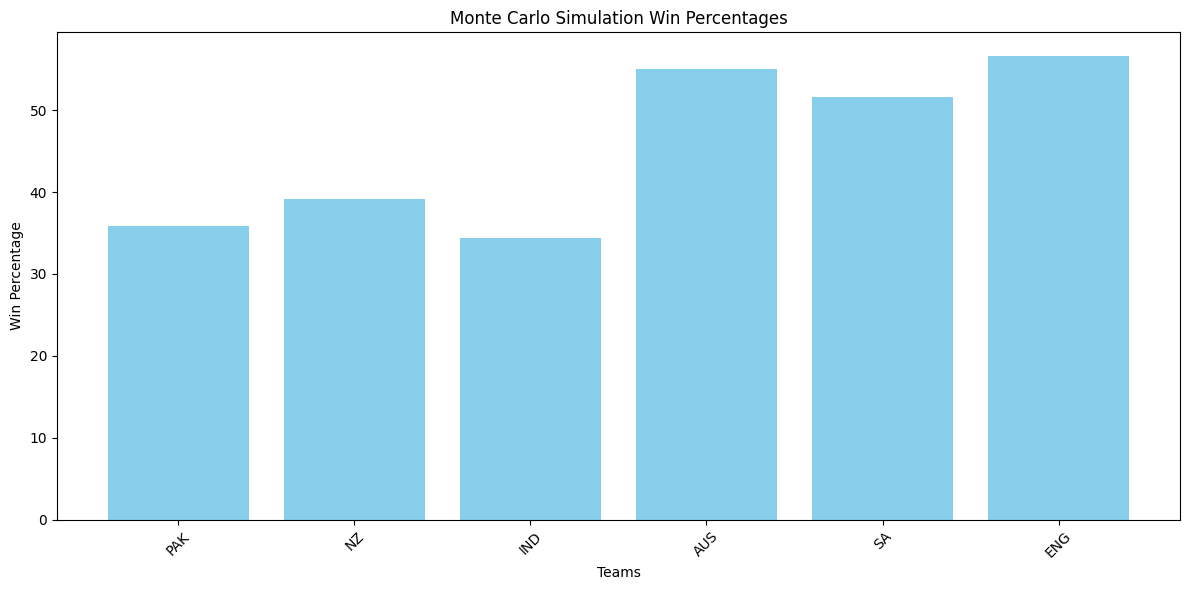

Cross-Validation Accuracy Scores: [0.595 0.59  0.63  0.55  0.59 ]
Mean CV Accuracy Score: 0.59
Mean Absolute Error: 0.46


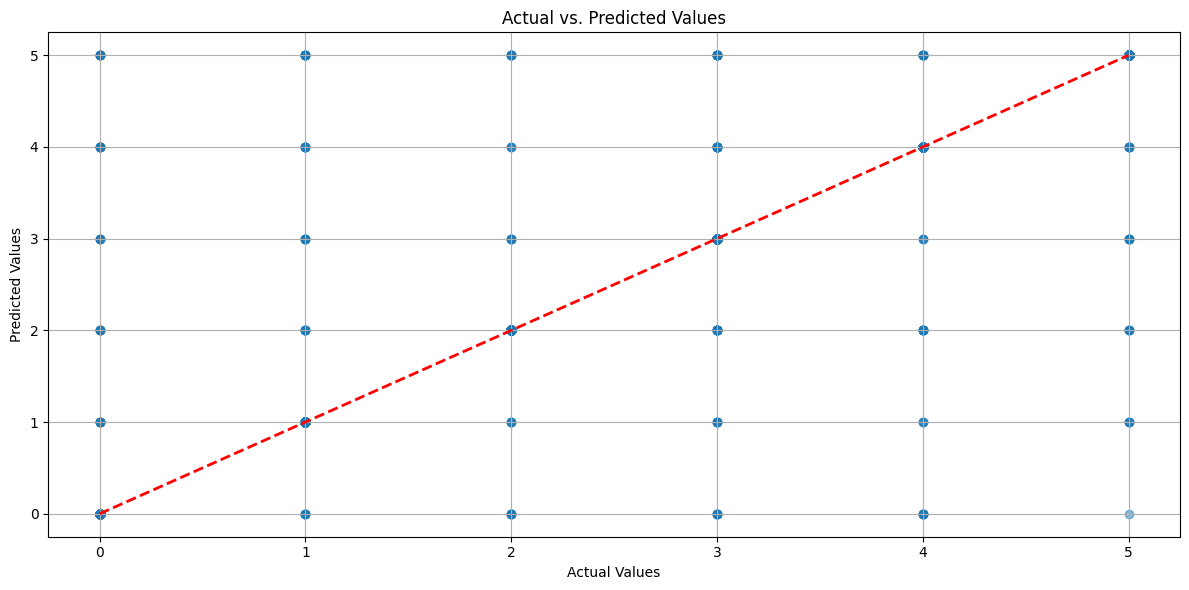

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
import numpy as np
import random
import matplotlib.pyplot as plt

# Load DataFrame from CSV
df = pd.read_csv("/Users/csrbharadwaj/Desktop/Projects/Woxen_project/synthetic_match_outcome_data.csv")

# Handle special case for 'Toss_Winner' and 'Match_Winner'
def adjust_winner_column(df):
    df['Match_Winner'] = df.apply(lambda row: row['Team1'] if row['Match_Winner'] == 'Team1' else row['Team2'], axis=1)
    df['Toss_Winner'] = df.apply(lambda row: row['Team1'] if row['Toss_Winner'] == 'Team1' else row['Team2'], axis=1)
    return df

df = adjust_winner_column(df)

# Create encoding dictionaries
def create_encodings(df, columns):
    encodings = {}
    for column in columns:
        unique_values = df[column].dropna().unique()
        encodings[column] = {value: idx for idx, value in enumerate(unique_values)}
    return encodings

def reverse_encodings(encodings):
    return {col: {idx: val for val, idx in encoding.items()} for col, encoding in encodings.items()}

# Define columns to encode
columns_to_encode = ['Team1', 'Team2', 'Venue', 'Toss_Winner', 'Toss_Decision', 'Match_Winner']
encodings = create_encodings(df, columns_to_encode)
reverse_encodings_dict = reverse_encodings(encodings)

# Encode DataFrame
def encode_df(df, encodings):
    encoded_df = df.copy()
    for column, encoding in encodings.items():
        encoded_df[column + '_Encoded'] = df[column].map(encoding)
    return encoded_df

encoded_df = encode_df(df, encodings)

# Features and target
features = encoded_df[['Team1_Encoded', 'Team2_Encoded', 'Venue_Encoded', 'Toss_Winner_Encoded', 'Toss_Decision_Encoded']]
target = encoded_df['Match_Winner_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Monte Carlo Simulation
def monte_carlo_simulation(model, encodings, num_simulations=1000):
    teams = list(encodings['Team1'].keys())
    venues = list(encodings['Venue'].keys())
    toss_decisions = list(encodings['Toss_Decision'].keys())
    
    # Initialize win counts
    team_wins = {team: 0 for team in teams}
    total_matches = {team: 0 for team in teams}

    for _ in range(num_simulations):
        # Randomly select inputs
        team1 = random.choice(teams)
        team2 = random.choice(teams)
        venue = random.choice(venues)
        toss_winner = random.choice(teams)
        toss_decision = random.choice(toss_decisions)
        
        if team1 == team2:
            continue
        
        try:
            # Encode input features
            team1_encoded = encodings['Team1'][team1]
            team2_encoded = encodings['Team2'][team2]
            venue_encoded = encodings['Venue'][venue]
            toss_winner_encoded = encodings['Toss_Winner'][toss_winner]
            toss_decision_encoded = encodings['Toss_Decision'][toss_decision]
        except KeyError as e:
            continue
        
        # Prepare input for prediction
        input_features = [[team1_encoded, team2_encoded, venue_encoded, toss_winner_encoded, toss_decision_encoded]]
        
        # Predict
        prediction_encoded = model.predict(input_features)[0]
        match_winner = reverse_encodings_dict['Match_Winner'][prediction_encoded]
        
        # Update win counts
        total_matches[team1] += 1
        total_matches[team2] += 1
        if match_winner == team1:
            team_wins[team1] += 1
        elif match_winner == team2:
            team_wins[team2] += 1

    # Calculate win percentages
    win_percentages = {team: (team_wins[team] / total_matches[team]) * 100 if total_matches[team] > 0 else 0 for team in teams}
    return win_percentages

# Run Monte Carlo Simulation
win_percentages = monte_carlo_simulation(model, encodings)
print("Monte Carlo Simulation Win Percentages:")
for team, percentage in win_percentages.items():
    print(f"{team}: {percentage:.2f}%")

# Plot Monte Carlo Simulation Results
def plot_win_percentages(win_percentages):
    teams = list(win_percentages.keys())
    percentages = list(win_percentages.values())
    
    plt.figure(figsize=(12, 6))
    plt.bar(teams, percentages, color='skyblue')
    plt.xlabel('Teams')
    plt.ylabel('Win Percentage')
    plt.title('Monte Carlo Simulation Win Percentages')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_win_percentages(win_percentages)

# Model Evaluation
def evaluate_model(model, X, y):
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy Score: {cv_scores.mean():.2f}")

    # Make predictions on the entire dataset
    y_pred = model.predict(X)

    # Calculate mean absolute error
    mae = mean_absolute_error(y, y_pred)
    print(f"Mean Absolute Error: {mae:.2f}")

    # Plot actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2)  # Diagonal line
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluate the model
evaluate_model(model, features, target)
